# Доп. задачи и анализа данных
## Задание 3.3

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.

**Баллы за задание:**

* Задача 1 -  2 баллов
* Задача 2 -  4 баллов
* Задача 3 -  4 баллов
* Задача 4 -  3 балла

### Задача 1
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид $\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$. Найдите решение задачи в матричном виде.


**Ответ.** pdf с решением отправлен вмести с этим ноутбуком.

### Задача 2

Скачайте <a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">данные</a> о стоимости квартир в Москве.	Описание данных доступно по <a href="https://github.com/bdemeshev/em301/blob/master/datasets/flats_moscow_description.txt">ccылке</a>.
	
Обучите линейную регрессионную модель для предсказания цены квартиры от всех других параметров. Проверьте гипотезы о незначимости признаков и постройте доверительные интервалы для коэффициентов модели. Определите признаки желаемой для себя квартиры в Москве и постройте предсказательный интервал ее цены.

In [8]:
flats <- read.delim(
    '/home/topcoder2k/ds-intro/data/raw/MatStat/flats_moscow.txt', 
    row.names = 1
)
head(flats)

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3
6,137,76,50,9,11.0,7,1,1,1,8


In [15]:
library(caret)

model <- lm(formula = price ~ ., data = flats)
summary(model)


Call:
lm(formula = price ~ ., data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-107.34  -14.23   -1.22   10.52  414.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.9780     5.6809  -4.221 2.54e-05 ***
totsp         1.5737     0.1181  13.330  < 2e-16 ***
livesp        1.3716     0.1782   7.695 2.19e-14 ***
kitsp         1.7409     0.3970   4.385 1.22e-05 ***
dist         -3.1704     0.2175 -14.579  < 2e-16 ***
metrdist     -1.2332     0.1711  -7.209 7.94e-13 ***
walk          9.2209     1.4307   6.445 1.44e-10 ***
brick         6.9052     1.5807   4.368 1.31e-05 ***
floor         6.5504     1.6113   4.065 4.98e-05 ***
code         -2.6339     0.3047  -8.644  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.29 on 2030 degrees of freedom
Multiple R-squared:  0.6827,	Adjusted R-squared:  0.6813 
F-statistic: 485.3 on 9 and 2030 DF,  p-value: < 2.2e-16


**Вывод.** Гипотезы о незначимости каждого из коэффициентов отвергаются. Также заодно заметим, что p-value F-статистики маленькое, так что гипотеза о незначимости ЛР тоже отвергается.

In [16]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-35.1189319,-12.836973
totsp,1.3421449,1.805184
livesp,1.0220751,1.721183
kitsp,0.9623293,2.519509
dist,-3.5969036,-2.743955
metrdist,-1.5686816,-0.897688
walk,6.4150409,12.026772
brick,3.8052097,10.005109
floor,3.3904145,9.710350
code,-3.2314701,-2.036342


Определим признаки желаемой квартиры (мечтать не вредно!):

In [17]:
head(flats, 10)

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3
6,137,76,50,9,11.0,7,1,1,1,8
7,98,59,39,6,7.5,10,0,0,1,8
8,88,55,36,6,9.0,5,1,1,0,4
9,225,80,56,9,9.0,5,1,1,1,3


In [25]:
totsp = 320
livesp = 200
kitsp = 60
dist = 0.1
metrdist = 3
walk = 1
brick = 1
floor = 12
code = 3
x_new = data.frame(
    matrix(
        c(totsp, livesp, kitsp, dist, metrdist, walk, brick, floor, code),
        ncol = 9
    )
)
colnames(x_new) <- c('totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
                'walk', 'brick', 'floor', 'code')

predict(model, x_new, level = 0.95, interval = 'confidence')

,fit,lwr,upr
1,941.188,897.2068,985.1692


**Вывод.** Таким образом, квартира будет стоить всего лишь 941k$. С моей стипендией в 5000 р. мне потребуется всего лишь 1150 лет. Ах, чёрт, я ещё забыл про рост цен со временем...

### Задача 3

*Эту задачу можно выполнить в Питоне. Можно в отдельном ноутбуке.*

Проведите эксперимент по определению реального уровня значимости критерия для проверки гипотезы о незначимости коэффициента в гауссовской линейной модели, если на самом деле в данных присутствует гетероскедастичность. 
Для этого смоделируйте некоторым образом двумерные данные $x$ и посчитайте по ним ожидаемый отклик 
	$y(x) = \theta_0 + \theta_1 x^{(1)} + \theta_2 x^{(2)}$, где коэффициенты выберите по своему усмотрению, причем $\theta_2 = 0$. 
Зашумите набор значений $y(x_i)$ некоторым шумом, дисперсия которого зависит от $x$ или от номера наблюдения. 
По таким данным обучите	линейную модель и проверьте гипотезу $\mathsf{H}_0\colon \theta_2 = 0$. 
Повторите эксперимент несколько раз и посчитайте долю случаев, в которых гипотеза отвергается. Распределение шума должно быть одинаковым в каждом эксперименте.

**Ответ.** Сделана в отдельном ноутбуке.

### Задача 4
Загрузите датасет <a href="https://github.com/txm676/sars/tree/master/R">`galapagos.csv`</a>, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` -- наименование острова;
* `species` -- количество наблюдаемых видов растений на острове;
* `endemics` -- количество уникальных видов [*в задаче не рассматриваем*];
* `area` -- площадь (км^2);
* `elevation` -- высота (м);
* `nearest` -- расстояние до ближайшего острова (км);
* `scruz` -- расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` -- площадь соседнего острова (км^2).

In [83]:
galapagos <- read.csv(
    '/home/topcoder2k/ds-intro/data/raw/MatStat/galapagos.csv',
    sep=';'
)
galapagos$endemics <- NULL
head(galapagos)

,island,species,area,elevation,nearest,scruz,adjacent
,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Baltra,58,25.09,332,0.6,0.6,1.84
2,Bartolome,31,1.24,109,0.6,26.3,572.33
3,Caldwell,3,0.21,114,2.8,58.7,0.78
4,Champion,25,0.10,46,1.9,47.4,0.18
5,Coamano,2,1.05,130,1.9,1.9,903.82
6,Daphne Major,18,0.34,119,8.0,8.0,1.84


Рассмотрим пуассоновскую (колличественную) регрессию. Какая ожидается зависимость отклика от признаков?

*Подсказка:* чему равно математическое ожидание отклика?

**Ответ.** Так как МО отклика равно $e^{x^T \theta}$, то именно такая зависимость отклика от признаков и ожидается.

Постройте графики зависимости отклика `species` от всех признаков. Значения каких признаков лучше прологарифмировать? 

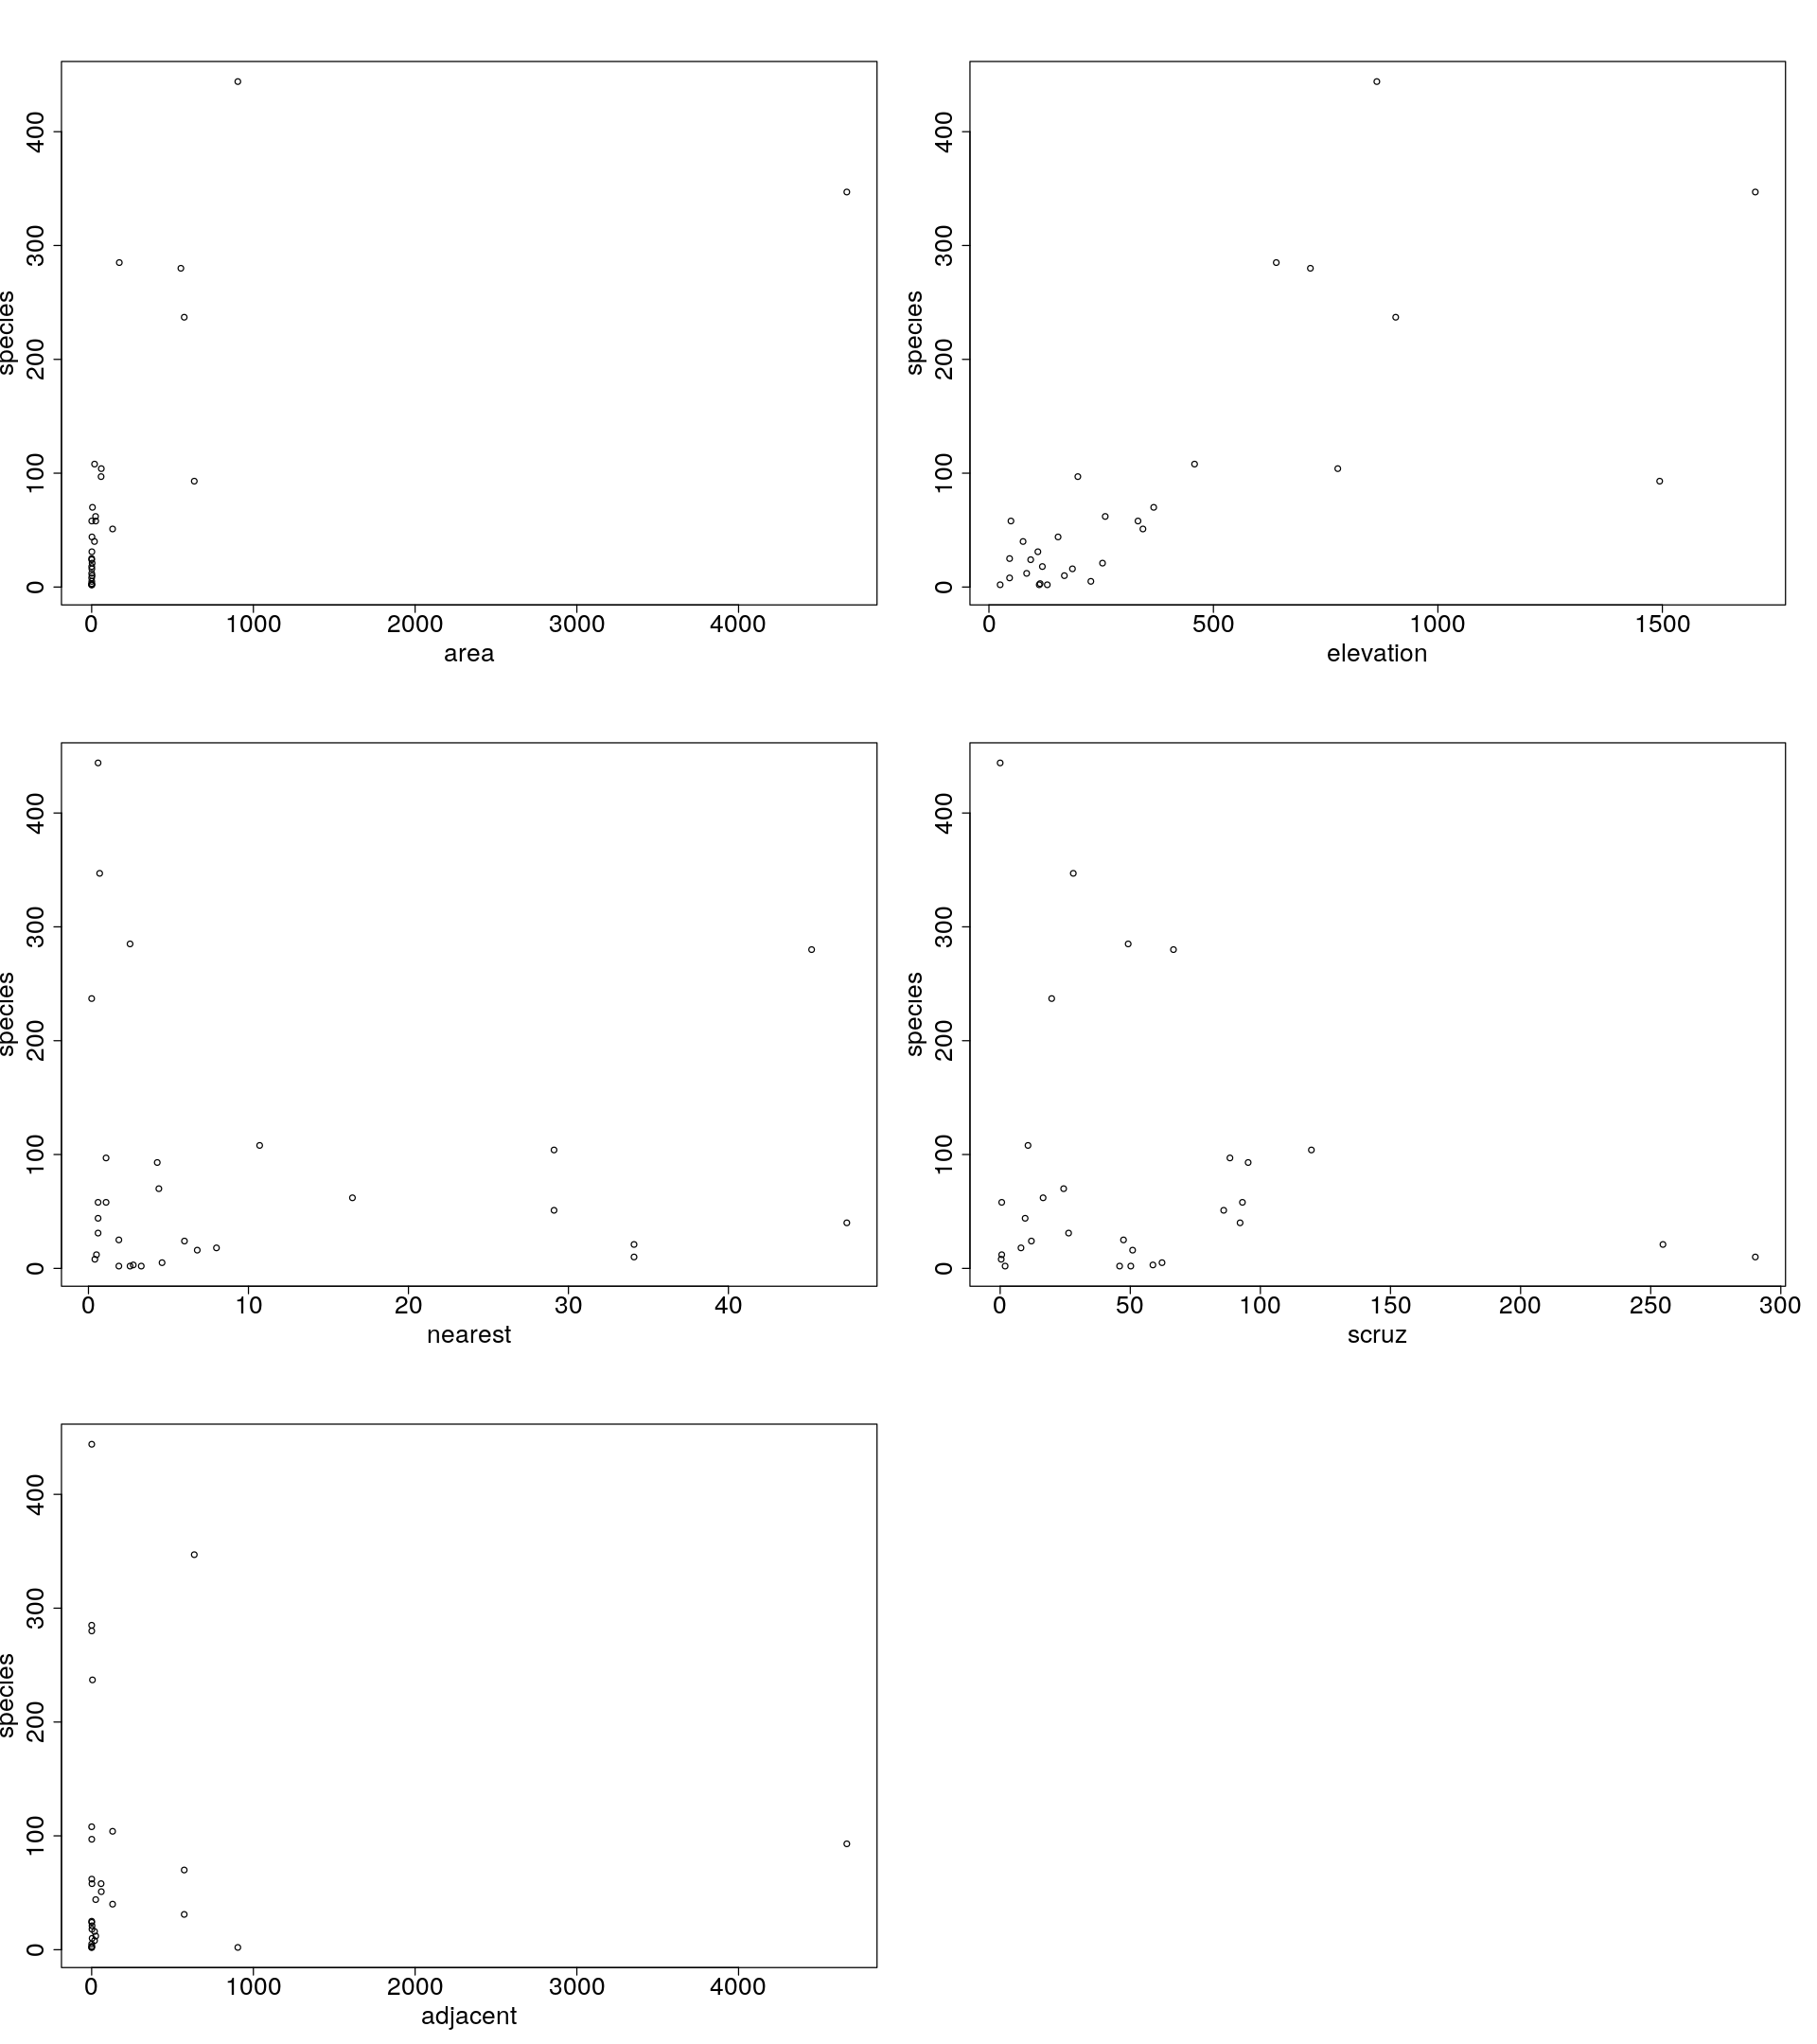

In [78]:
options(repr.plot.width = 16, repr.plot.height = 18)
par(mfrow=c(3, 2))

for (column_name in colnames(galapagos)) {
    if(column_name != 'species' && column_name != 'island') {
        plot(as.formula(paste("species ~ ", column_name)), galapagos,
             cex.lab = 2, cex.axis = 2)
    }
}

**Вывод.** Лучше прологарифмировать те признаки, от которых наблюдается линейная зависимость target-а (ведь тогда в модели эти признаки будут линейными после возведения в экспоненту), а также те, в которых есть резкий рост значений target-а в узком диапазоне значений признака (то есть такие признаки смогут "конкурировать" и обучаться с экспонентой на равных).

Обучите пуассоновскую регрессию по всем признакам, предварительно прологарифмировав некоторых из них. В R регрессию можно сделать функцией `glm`, указав конкретный тип обобщенной модели как `family = poisson()`. Напечатайте `summary` модели.

In [84]:
# Логарифмируем
galapagos$area <- log(galapagos$area, base = exp(1))
galapagos$adjacent <- log(galapagos$adjacent, base = exp(1))
head(galapagos)

,island,species,area,elevation,nearest,scruz,adjacent
,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Baltra,58,3.22246937,332,0.6,0.6,0.6097656
2,Bartolome,31,0.21511139,109,0.6,26.3,6.3497158
3,Caldwell,3,-1.56064778,114,2.8,58.7,-0.2484614
4,Champion,25,-2.30258508,46,1.9,47.4,-1.7147984
5,Coamano,2,0.04879012,130,1.9,1.9,6.8066302
6,Daphne Major,18,-1.07880965,119,8.0,8.0,0.6097656


In [85]:
model = glm(species ~ area + elevation + nearest + scruz + adjacent,
            data = galapagos, family = poisson())
summary(model)


Call:
glm(formula = species ~ area + elevation + nearest + scruz + 
    adjacent, family = poisson(), data = galapagos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4896  -2.6099  -0.6567   2.4306   8.7654  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.453e+00  5.187e-02  66.584  < 2e-16 ***
area         3.543e-01  1.602e-02  22.117  < 2e-16 ***
elevation    7.011e-05  1.025e-04   0.684    0.494    
nearest     -1.718e-03  1.672e-03  -1.027    0.304    
scruz       -2.539e-03  5.715e-04  -4.443 8.87e-06 ***
adjacent    -9.344e-02  8.545e-03 -10.935  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  365.64  on 24  degrees of freedom
AIC: 538.47

Number of Fisher Scoring iterations: 5


Оставьте только значимые признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

In [99]:
library(bestglm)

galapagos2 <- galapagos[, c(3, 4, 5, 6, 7)]
galapagos2$species <- galapagos$species
bestglm(galapagos2, family = poisson(), IC = "BIC")

Morgan-Tatar search since family is non-gaussian.



BIC
BICq equivalent for q in (4.46904446782526e-09, 0.68387105384684)
Best Model:
               Estimate   Std. Error    z value     Pr(>|z|)
(Intercept)  3.45701146 0.0516329617  66.953577 0.000000e+00
area         0.36253517 0.0080856524  44.836849 0.000000e+00
scruz       -0.00297321 0.0004795808  -6.199602 5.660606e-10
adjacent    -0.08737342 0.0062953229 -13.879101 8.480049e-44

**Замечание.** Как ни крути, ```elevation, nearest``` убираем.

In [98]:
galapagos2$elevation <- NULL
galapagos2$nearest <- NULL

model = glm(species ~ area + scruz + adjacent,
            data = galapagos2, family = poisson())
summary(model)


Call:
glm(formula = species ~ area + scruz + adjacent, family = poisson(), 
    data = galapagos2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4380  -2.3327  -0.6106   2.5260   8.8574  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.4570115  0.0516330   66.95  < 2e-16 ***
area         0.3625352  0.0080857   44.84  < 2e-16 ***
scruz       -0.0029732  0.0004796   -6.20 5.66e-10 ***
adjacent    -0.0873734  0.0062953  -13.88  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  367.97  on 26  degrees of freedom
AIC: 536.8

Number of Fisher Scoring iterations: 5


**Ответ.** Свободный коэффициент устанавливает масштаб значений в независимости от признаков (так как он в экспоненте и не умножается на x), число видов прямопропорционально площади с заданным коэффициентом, а близость к главному острову и размеры соседнего острова уменьшают число видов экспоненциально (так как соотв. коэф-ты отрицательные).

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения). 

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитайте и напечатайте ковариационную матрицу оценок коэффициентов модели с помощью функции `vcovHC`, рассмотрев тип оценки `HC3`.

In [103]:
?vcovHC

In [102]:
library('lmtest')
library("sandwich")

vcovHC(model, type = "HC3")

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,(Intercept),area,scruz,adjacent
(Intercept),0.0382914773,-5.380001e-03,-1.340556e-04,1.865033e-03
area,-0.0053800014,9.964898e-04,1.054524e-05,-5.052216e-04
scruz,-0.0001340556,1.054524e-05,2.151437e-06,-4.901018e-06
adjacent,0.0018650329,-5.052216e-04,-4.901018e-06,5.872167e-04


Напечатайте таблицу статистических свойств оценок коэффициентов и доверительные интервалы. Для этого можно использовать те же функции, что и для гауссовской модели.

In [104]:
coef.table <- coeftest(model, vcov = vcovHC(model, type = "HC3"))
coef.table


z test of coefficients:

              Estimate Std. Error z value  Pr(>|z|)    
(Intercept)  3.4570115  0.1956821 17.6665 < 2.2e-16 ***
area         0.3625352  0.0315672 11.4845 < 2.2e-16 ***
scruz       -0.0029732  0.0014668 -2.0270 0.0426588 *  
adjacent    -0.0873734  0.0242326 -3.6056 0.0003114 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**Замечание**. Нууу, не сказать, что для признаков оценка равна дисперсии. Хотя для ```area``` попадание близкое.

Придумайте на Галапагосском архипелаге еще один остров, задайте ему некоторые характеристики и назовите своим именем. Оцените, в каком интервале лежит ожидаемое количество видов растений на этом острове.

*Указания.* Установите в функции `predict` опцию `se.fit = TRUE`. Из полученных значений сформируйте доверительный интервал линеаризованного отклика. Доверительный интервал для ожидаемого отклика получите с помощью функции `<имя обученной модели>$family$linkinv`.

In [126]:
x_new = data.frame(matrix(c(
    log(3, base = exp(1)),
    50,
    0.6,
    0.6,
    0.6097656
), ncol=5))
colnames(x_new) = c("area", "elevation", "nearest", "scruz", "adjacent")

# Получим интервал для линеаризированного отклика по формуле с лекции
predicted = predict(model, x_new, se.fit = TRUE)
linear_int = data.frame(matrix(c(
    predicted$fit - qnorm(1 - 0.05 / 2) * predicted$se.fit,
    predicted$fit + qnorm(1 - 0.05 / 2) * predicted$se.fit
), ncol=2))
colnames(linear_int) = c("lwr_bound", "upr_bound")

# Теперь для ожидаемого
expect_int = poisson()$linkinv(linear_int)
expect_int

,lwr_bound,upr_bound
,<dbl>,<dbl>
1,40.94095,48.8298


Наконец, получите предсказательный интервал для количества растений на вашем острове. Для этого посчитайте предсказательные интервалы для пуассоновских случайных величин, параметры которых соответствуют границам доверительного интервала, построенного на предыдущем шаге. Объедините эти два интервала.

In [128]:
# Как и говорит условие, возьмём левую и правую границы, построим  для них
# интервалы для ожидаемого отклика, а потом возведём в exp и объединим
linear_int = data.frame(matrix(c(
    predicted$fit - 2 * qnorm(1 - 0.05 / 2) * predicted$se.fit,
    predicted$fit,
    predicted$fit,
    predicted$fit + 2 * qnorm(1 - 0.05 / 2) * predicted$se.fit
), ncol=4))
colnames(linear_int) = c("left_lwr_bnd", "left_upr_bnd", "right_lwr_bnd",
                        "right_upr_bnd")

# Теперь для ожидаемого
expect_int = poisson()$linkinv(linear_int)
expect_int

,left_lwr_bnd,left_upr_bnd,right_lwr_bnd,right_upr_bnd
,<dbl>,<dbl>,<dbl>,<dbl>
1,37.48819,44.71173,44.71173,53.32716


**Ответ.** Сливаем вместе интервалы и получаем ответ: $[37.49; 53.32]$. Нуу, ничего так у меня остров, приезжайте в гости ;)